In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import sqlite3
import Code.Preparation as prep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [279]:
# WorldDf = pd.read_csv('Data/WorldDf.csv')
HappyDf = pd.read_csv('Data/CleanedHappy.csv')
RateDf = pd.read_csv(prep.path('sucide.csv'))

In [283]:
RateDf = RateDf.groupby(['country','year']).mean()

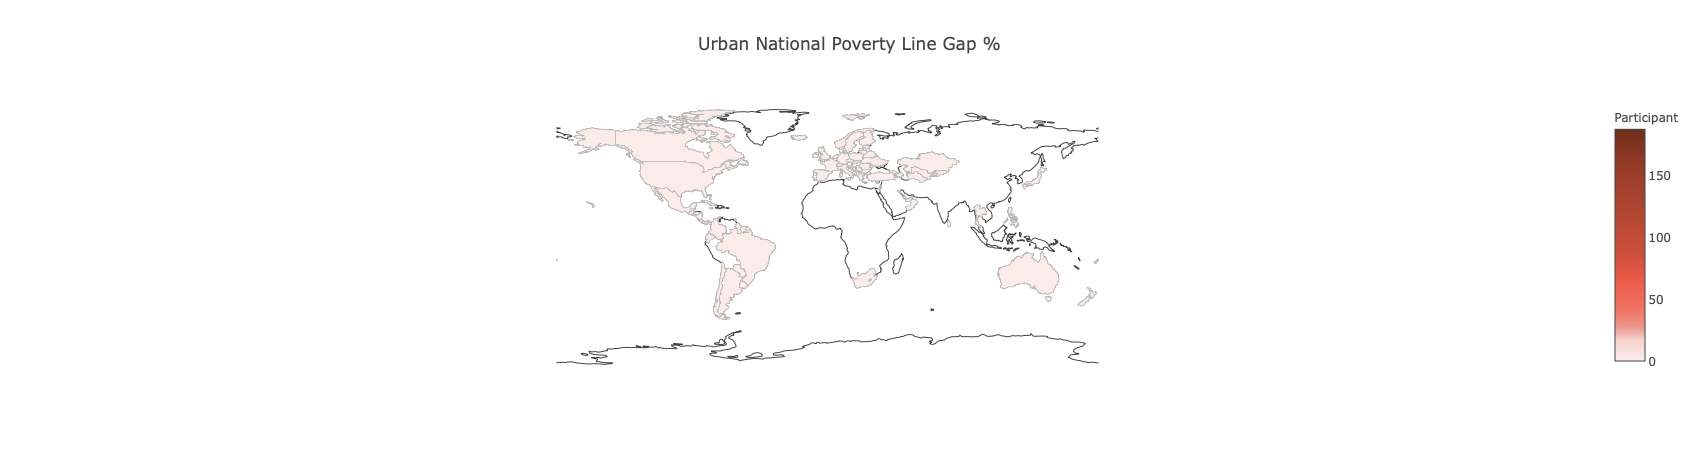

In [40]:

# data = [ dict(
#         type = 'choropleth',
#         locations = RateDf['suicides/100k pop'].index,
#         locationmode = 'country names',
#         z = RateDf['suicides/100k pop'].values,
#         colorscale=
#             [[0.0, "rgb(251, 237, 235)"],
#             [0.09, "rgb(245, 211, 206)"], 
#             [0.12, "rgb(239, 179, 171)"],
#             [0.15, "rgb(236, 148, 136)"],
#             [0.22, "rgb(239, 117, 100)"],
#             [0.35, "rgb(235, 90, 70)"],
#             [0.45, "rgb(207, 81, 61)"],
#             [0.65, "rgb(176, 70, 50)"],
#             [0.85, "rgb(147, 59, 39)"],
#             [1.00, "rgb(110, 47, 26)"]],
#         autocolorscale = False,
#         reversescale = False,
#         marker = dict(
#             line = dict (
#                 color = 'rgb(180,180,180)', 
#                 width = 0.5
#             ) 
#         ),
#         colorbar = dict(
#             autotick = True,
#             tickprefix = '',
#             title = 'Participant'),
#       ) ]

# layout = dict(
#     title = "Urban National Poverty Line Gap %",
#     geo = dict(
#         showframe = False,
#         showcoastlines = True,
#         projection = dict(type = 'Mercator'),
#         width=500,height=400)
# )

# w_map = dict( data=data, layout=layout)
# iplot( w_map, validate=False)

### Happiness Scores

In [341]:
R_names = ['Argentina','Brazil','Chile','Colombia','Ecuador','Paraguay','Uruguay','Guyana','Suriname']
# Data is missing for the following countries in dataset: Bolivia, Peru, Venezuela, French Guiana

def plot_rate_S(df):
    fig, ax = plt.subplots(figsize=(20,10))
    
    try:
        for name in R_names:
            country = df.loc[name]['suicides/100k pop']
            plt.plot(country, label=name)
            plt.xticks(rotation = 45)
            plt.legend();
    except:
        pass
        
    return None

R_names_N = ['United States', 'Mexico', 'Canada', 'Guatemala', 'Nicaragua', 'Costa Rica', 'Panama', 'El Salvador', 'Belize']
# Data is missing for the following countries in dataset: Honduras

def plot_rate_N(df):
    fig, ax = plt.subplots(figsize=(20,10))
    
    try:
        for name in R_names_N:
            country = df.loc[name]['suicides/100k pop']
            plt.plot(country, label=name)
            plt.xticks(rotation = 45)
            plt.legend();
    except:
        pass
        
    return None


names = ['Argentina','Brazil','Bolivia','Chile','Colombia','Ecuador','Peru','Venezuela','Paraguay','Uruguay','Guyana','Suriname','French Guiana']

def plot_happy_S(df):
    fig, ax = plt.subplots(figsize=(10,10))
    
    for name in names:
        country = df[df.Country == name].set_index('Year')['Happiness Score']
        plt.plot(country, label=name)
        plt.xticks(rotation = 45)
        plt.legend();
    return None


names_N = ['United States', 'Mexico', 'Canada', 'Guatemala', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama', 'El Salvador', 'Belize']

def plot_happy_N(df):
    fig, ax = plt.subplots(figsize=(10,10))
    
    for name in names_N :
        country = df[df.Country == name].set_index('Year')['Happiness Score']
        plt.plot(country, label=name)
        plt.xticks(rotation = 45)
        plt.legend();
    return None

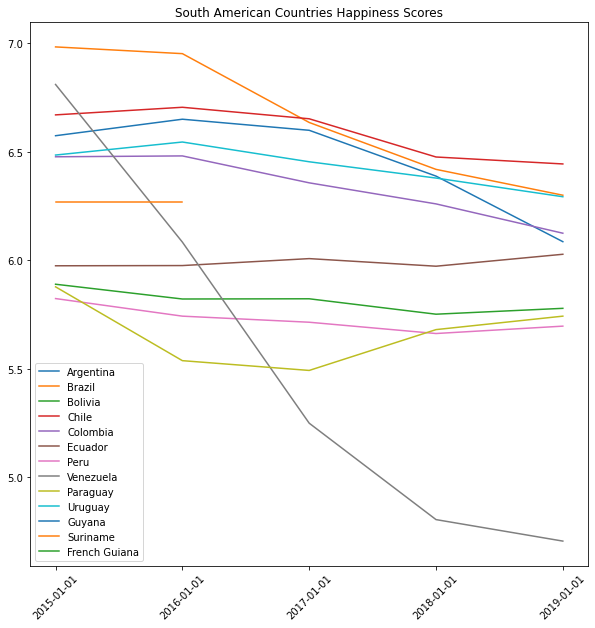

In [342]:
plot_happy_S(HappyDf)
plt.title('South American Countries Happiness Scores');

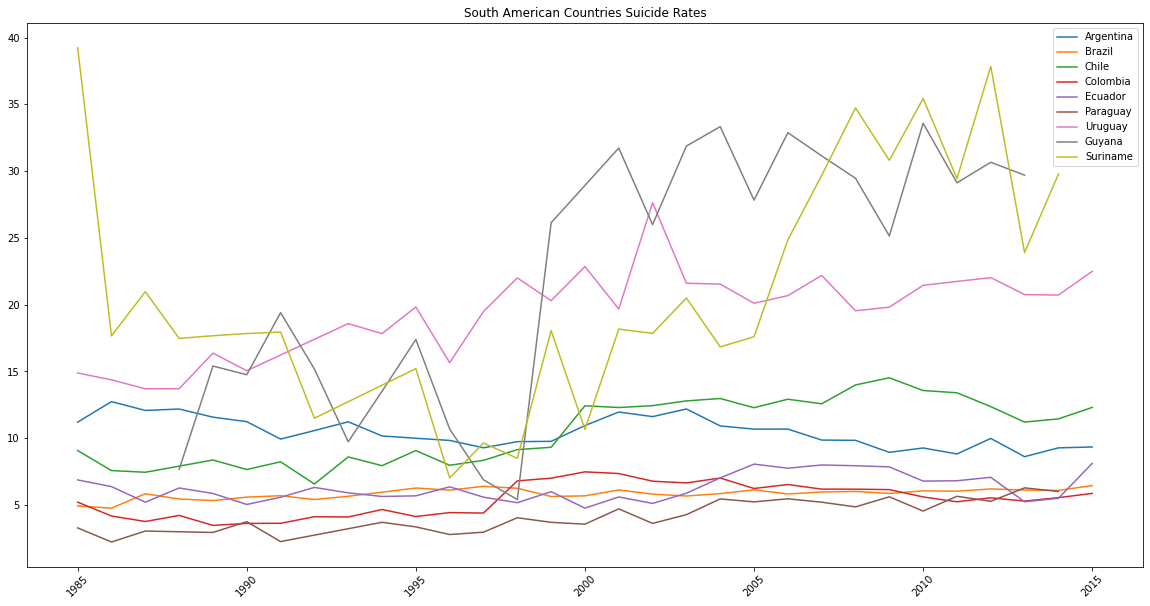

In [343]:
plot_rate_S(RateDf)
plt.title('South American Countries Suicide Rates');

* North American Countries

Text(0.5, 1.0, 'North American Countries Suicide Rates')

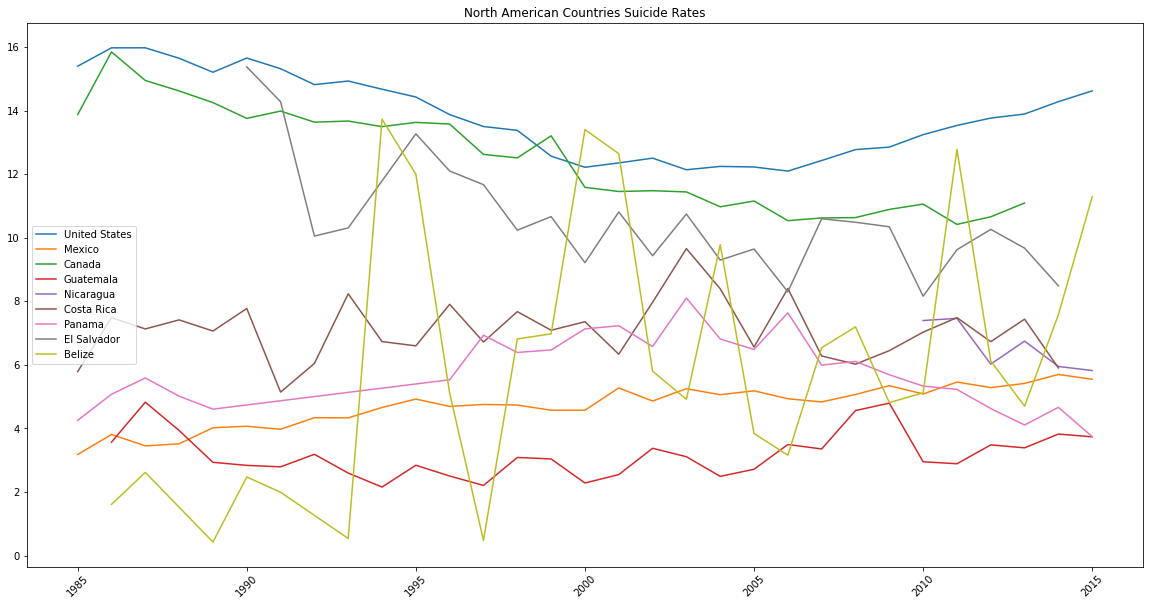

In [344]:
plot_rate_N(RateDf)
plt.title("North American Countries Suicide Rates")

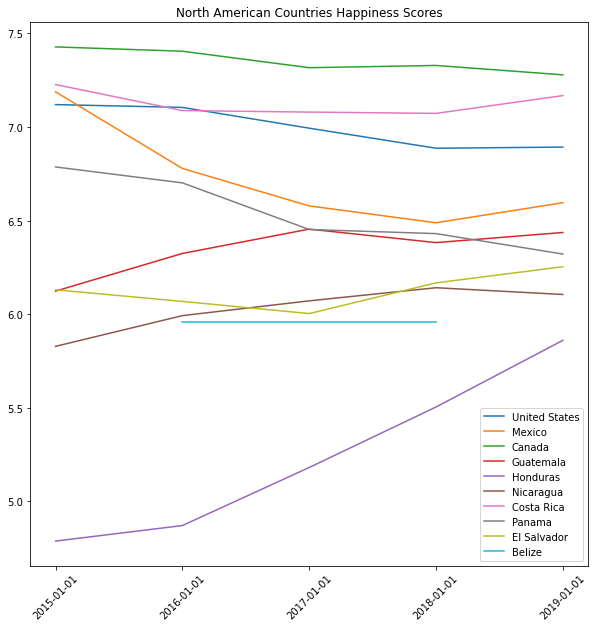

In [346]:
plot_happy_N(HappyDf)
plt.title("North American Countries Happiness Scores");

In [268]:
Arg_R = RateDf[RateDf.Country == 'Argentina'].set_index('Year')['suicides/100k pop'].mean()
Arg_W = WorldDf[WorldDf.Country == 'Argentina'].set_index('Year')
Arg_debt = Arg_W[Arg_W.IndicatorName == 'Multilateral debt (% of total external debt)']['Value']
Arg_HDI = RateDf[RateDf.Country == 'Argentina'].set_index('Year')['HDI for year']*100
Arg_gdp = RateDf[RateDf.Country == 'Argentina'].set_index('Year')['gdp_per_capita ($)']/100
Arg_life = Arg_W[Arg_W.IndicatorName == 'Life expectancy at birth, total (years)']['Value']

In [190]:
WorldDf.IndicatorName.value_counts()[0:50]

Surface area (sq. km)                                            8815
Land area (sq. km)                                               8815
Population, total                                                8647
Population growth (annual %)                                     8643
Rural population (% of total population)                         8597
Urban population (% of total)                                    8597
Urban population                                                 8581
Rural population                                                 8581
Urban population growth (annual %)                               8578
Population density (people per sq. km of land area)              8560
Primary education, duration (years)                              8508
Secondary education, duration (years)                            8418
Rural population growth (annual %)                               8299
Fixed telephone subscriptions                                    8287
Fixed telephone subs

In [168]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

AttributeError: 'numpy.float64' object has no attribute 'sort_index'

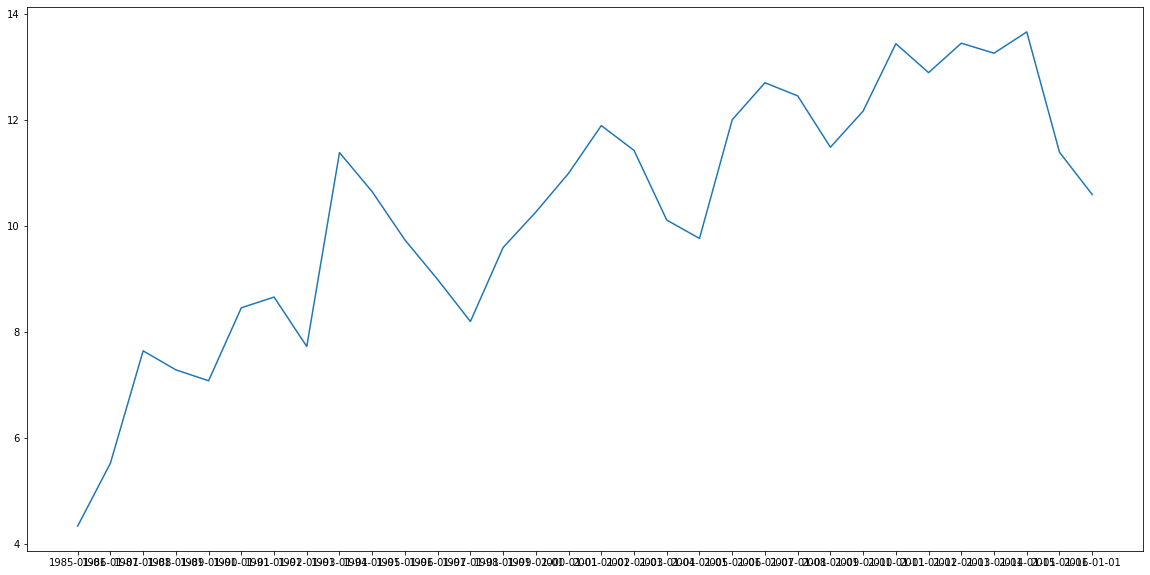

In [269]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Arg_debt.sort_index(), label='Multilateral Dept')
ax.plot(Arg_R.sort_index(), label='Suicide Rate')
ax.plot(Arg_HDI.sort_index(), label='Human Development Index')
ax.plot(Arg_gdp.sort_index(), label='GDP Per Capita')
ax.plot(Arg_life.sort_index(), label='Life Expentancy')
plt.xticks(rotation = 45)
plt.legend();

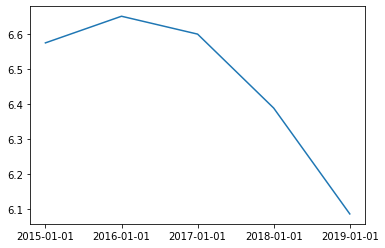

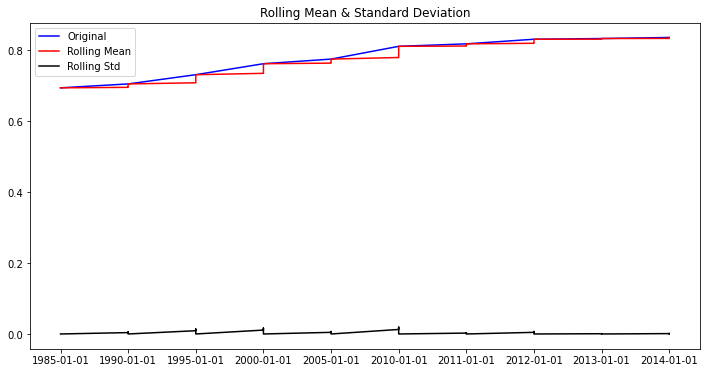

Results of Dickey-Fuller Test: 

Test Statistic                  -1.969616
p-value                          0.300052
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [171]:
stationarity_check(Arg_HDI/100)

Year
2015-01-01    6.574
2016-01-01    6.650
2017-01-01    6.599
2018-01-01    6.388
2019-01-01    6.086
Name: Happiness Score, dtype: float64